In [1]:
import pandas as pd
import numpy as np

In [2]:
import kagglehub

path = kagglehub.dataset_download("goelyash/housing-price-dataset-of-delhiindia")
print("Path to dataset files:", path)

100%|██████████| 944k/944k [00:00<00:00, 84.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/goelyash/housing-price-dataset-of-delhiindia/versions/3


In [3]:
import os

print(os.listdir(path))

['Delhi_v2.csv']


In [4]:
csv_path = os.path.join(path, "Delhi_v2.csv")
data = pd.read_csv(csv_path)

In [5]:
data.head()

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593


In [6]:
data.shape

(7738, 18)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7738 non-null   int64  
 1   price             7738 non-null   float64
 2   Address           7738 non-null   object 
 3   area              7738 non-null   float64
 4   latitude          7738 non-null   float64
 5   longitude         7738 non-null   float64
 6   Bedrooms          7738 non-null   float64
 7   Bathrooms         7738 non-null   float64
 8   Balcony           5166 non-null   float64
 9   Status            7164 non-null   object 
 10  neworold          7738 non-null   object 
 11  parking           2612 non-null   float64
 12  Furnished_status  4124 non-null   object 
 13  Lift              1733 non-null   float64
 14  Landmarks         2759 non-null   object 
 15  type_of_building  7738 non-null   object 
 16  desc              7738 non-null   object 


In [8]:
for col in data.columns:
    print(f"\nValue counts for {col}:")
    print(data[col].value_counts())



Value counts for Unnamed: 0:
Unnamed: 0
7737    1
0       1
1       1
2       1
3       1
       ..
14      1
13      1
12      1
11      1
10      1
Name: count, Length: 7738, dtype: int64

Value counts for price:
price
4500000.0     290
3500000.0     252
4000000.0     247
6000000.0     243
5500000.0     223
             ... 
2480000.0       1
19800000.0      1
5140000.0       1
47000000.0      1
8450000.0       1
Name: count, Length: 584, dtype: int64

Value counts for Address:
Address
Raj Nagar Extension, Ghaziabad, Delhi NCR                                     163
Indirapuram, Ghaziabad, Delhi NCR                                             152
Greater Noida West, Greater Noida, Delhi NCR                                  100
Noida Extension, Noida, Delhi NCR                                              63
Crossings Republik, Ghaziabad, Delhi NCR                                       61
                                                                             ... 
Ramakrishna ap

In [9]:
data.isna().sum()

,0
Unnamed: 0,0
price,0
Address,0
area,0
latitude,0
longitude,0
Bedrooms,0
Bathrooms,0
Balcony,2572
Status,574


In [10]:
drop_cols = [
    "Unnamed: 0",
    "desc",
    "Landmarks",
    "Address",
    "Balcony",
    "parking",
    "Furnished_status",
    "Lift",
    "Price_sqft"
]

data = data.drop(columns=drop_cols)

In [11]:
data.describe()

,price,area,latitude,longitude,Bedrooms,Bathrooms
count,7.738000e+03,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000
mean,8.320635e+06,1409.506591,28.552092,77.273476,2.708193,2.501163
std,7.223197e+06,718.929581,0.107420,0.180606,0.877026,0.867050
min,1.700000e+06,501.000000,28.240023,76.884101,2.000000,2.000000
25%,4.200000e+06,990.000000,28.455539,77.078590,2.000000,2.000000
50%,6.000000e+06,1250.000000,28.574637,77.345320,3.000000,2.000000
75%,9.500000e+06,1650.000000,28.642520,77.421054,3.000000,3.000000
max,8.500000e+07,9500.000000,28.799748,77.688028,10.000000,10.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             7738 non-null   float64
 1   area              7738 non-null   float64
 2   latitude          7738 non-null   float64
 3   longitude         7738 non-null   float64
 4   Bedrooms          7738 non-null   float64
 5   Bathrooms         7738 non-null   float64
 6   Status            7164 non-null   object 
 7   neworold          7738 non-null   object 
 8   type_of_building  7738 non-null   object 
dtypes: float64(6), object(3)
memory usage: 544.2+ KB


In [13]:
data.head()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Status,neworold,type_of_building
0,5600000.0,1350.0,28.608850,77.460560,3.0,3.0,Under Construction,New Property,Flat
1,8800000.0,1490.0,28.374236,76.952416,3.0,3.0,Ready to Move,New Property,Flat
2,16500000.0,2385.0,28.645769,77.385110,4.0,5.0,Ready to Move,New Property,Flat
3,3810000.0,1050.0,28.566914,77.436434,2.0,2.0,NaN,New Property,Flat
4,6200000.0,1350.0,28.520732,77.356491,2.0,2.0,Ready to Move,Resale,Flat


In [14]:
data.isna().sum().sort_values(ascending=False)


,0
Status,574
price,0
area,0
longitude,0
latitude,0
Bedrooms,0
Bathrooms,0
neworold,0
type_of_building,0


In [15]:
data.nunique().sort_values(ascending=False)


,0
latitude,2942
longitude,2912
area,1102
price,584
Bedrooms,9
Bathrooms,9
Status,2
neworold,2
type_of_building,2


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

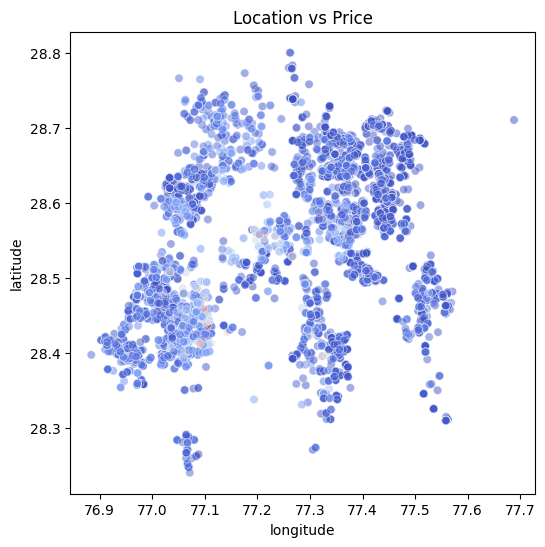

In [18]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    x=data["longitude"],
    y=data["latitude"],
    hue=data["price"],
    palette="coolwarm",
    alpha=0.5,
    legend=False
)
plt.title("Location vs Price")
plt.show()


In [19]:
data["Status"].value_counts(dropna=False)


,count
Status,
Ready to Move,7148
NaN,574
Under Construction,16


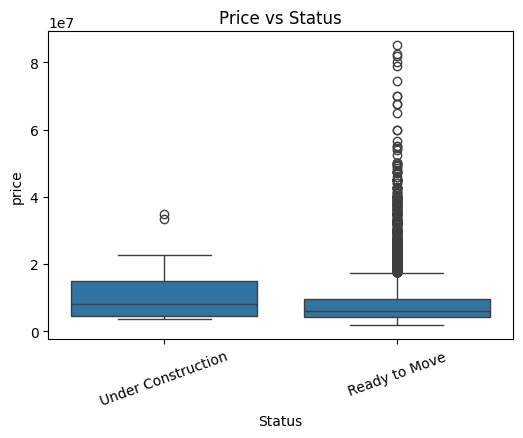

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x=data["Status"], y=data["price"])
plt.title("Price vs Status")
plt.xticks(rotation=20)
plt.show()


In [21]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["price"])
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20, random_state=42)

X_train = X_train.copy()
X_test = X_test.copy()

X_train["location_cluster"] = kmeans.fit_predict(
    X_train[["latitude", "longitude"]]
)

X_test["location_cluster"] = kmeans.predict(
    X_test[["latitude", "longitude"]]
)


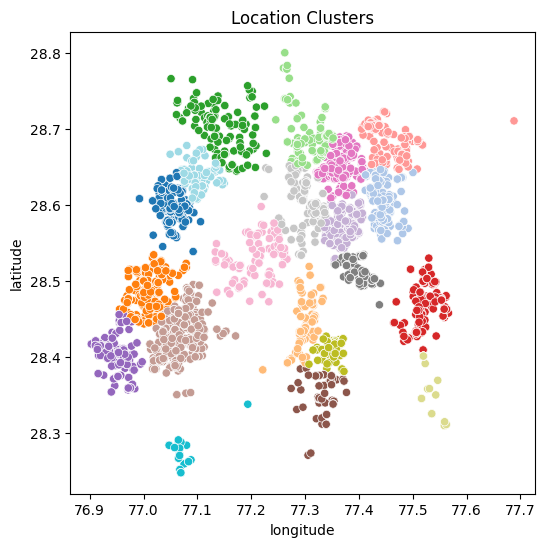

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sns.scatterplot(
    x=X_train["longitude"],
    y=X_train["latitude"],
    hue=X_train["location_cluster"],
    palette="tab20",
    legend=False
)
plt.title("Location Clusters")
plt.show()


In [24]:
num_cols = [
    "area",
    "latitude",
    "longitude",
    "Bedrooms",
    "Bathrooms"
]

cat_cols = [
    "Status",
    "neworold",
    "type_of_building",
    "location_cluster"
]


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


In [26]:
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


In [27]:
categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_cols),
        ("cat", categorical_pipeline, cat_cols)
    ]
)


In [29]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(X_train_processed.shape)
print(X_test_processed.shape)


(6190, 31)
(1548, 31)


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [31]:
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_processed, y_train)


RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [32]:
y_pred = rf.predict(X_test_processed)


In [33]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))


MAE: 1055725.4316725642
R² score: 0.9306560988858087


In [34]:
from sklearn.pipeline import Pipeline

final_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    ))
])


In [35]:
final_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['area', 'latitude',
                                                   'longitude', 'Bedrooms',
                                                   'Bathrooms']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Status', 'neworold',
                                                   'type_of_building',
                                                   'location_cluster'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=300, n_jobs=-1,
                                       random_state=42))])

In [36]:
y_pred_pipeline = final_model.predict(X_test)

print("Pipeline MAE:", mean_absolute_error(y_test, y_pred_pipeline))
print("Pipeline R²:", r2_score(y_test, y_pred_pipeline))


Pipeline MAE: 1055725.4316725642
Pipeline R²: 0.9306560988858087


In [37]:
import pandas as pd

new_house = pd.DataFrame([{
    "area": 1500,
    "latitude": 28.61,
    "longitude": 77.23,
    "Bedrooms": 3,
    "Bathrooms": 3,
    "Status": "Ready to Move",
    "neworold": "Resale",
    "type_of_building": "Flat",
    "location_cluster": 5   # example cluster
}])

price_pred = final_model.predict(new_house)
print("Predicted price:", price_pred[0])


Predicted price: 13428500.0
